## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

### Alunos

Leonardo Monteiro Neres de Lima - 1615080320 (lmndl.eng16@uea.edu.br) <br>
Thatielen Oliveira Pereira - 1515080618 (top.eng@uea.edu.br) <br>
Vyctor Lima Negreiros - 1615080372 (vln.eng16@uea.edu.br) <br>

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 

## Testando Redes Neurais sem os Atributos Categórios

### Testando Redes Neurais sem os Atributos Categórios

### 1. Abra a base de dados em questão

In [15]:
data = pd.read_csv('../datasets/covtype.csv', sep=";")

In [4]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/datasets/covtype.csv', sep=";")

Mounted at /content/drive


### 2. Elimine todas as colunas relativas aos atributos categóricos

In [18]:
patterns = ['Soil_Type', 'Wilderness_Area']
categorical_columns = [column for column in data.columns if not any(pattern in column for pattern in patterns)]

data = data[categorical_columns]

In [19]:
print(data.columns.to_list())

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']


### 3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

In [20]:
X, Y = data[data.columns.drop('Cover_Type')], data['Cover_Type']

### 4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

### 5. Efetue o escalonamento dos atributos

In [9]:
X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)

### 5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios

**5.1 Utilize a função de ativação ReLU**<br>
**5.2 Utilize o solver Adam**<br>
**5.3 Imprima o passo a passo do treinamento**<br>
**5.4 Utilize o número máximo de épocas igual a 300**

In [ ]:
perceptron = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=True, max_iter=300)

In [ ]:
perceptron.fit(X_train_std, Y_train);

Iteration 1, loss = 0.90057005
Iteration 2, loss = 0.71023686
Iteration 3, loss = 0.68932878
Iteration 4, loss = 0.68048000
Iteration 5, loss = 0.67511948
Iteration 6, loss = 0.67117152
Iteration 7, loss = 0.66887583
Iteration 8, loss = 0.66703407
Iteration 9, loss = 0.66537890
Iteration 10, loss = 0.66365219
Iteration 11, loss = 0.66213481
Iteration 12, loss = 0.66125390
Iteration 13, loss = 0.66058511
Iteration 14, loss = 0.66005505
Iteration 15, loss = 0.65957553
Iteration 16, loss = 0.65922977
Iteration 17, loss = 0.65886395
Iteration 18, loss = 0.65836718
Iteration 19, loss = 0.65792777
Iteration 20, loss = 0.65745198
Iteration 21, loss = 0.65720102
Iteration 22, loss = 0.65686246
Iteration 23, loss = 0.65662604
Iteration 24, loss = 0.65636932
Iteration 25, loss = 0.65620250
Iteration 26, loss = 0.65612268
Iteration 27, loss = 0.65599110
Iteration 28, loss = 0.65585932
Iteration 29, loss = 0.65581536
Iteration 30, loss = 0.65570859
Iteration 31, loss = 0.65569859
Iteration 32, los

### 6. Com o modelo em questão, após o treinamento, apresente:

**6.1 Matriz de confusão para o conjunto de teste**

In [ ]:
Y_pred_test = perceptron.predict(X_test_std)

cm_test = confusion_matrix(Y_test, Y_pred_test)

In [ ]:
print(cm_test)

[[44972 17242     7     0    10    13  1045]
 [15596 67914  1147     0   115   567     8]
 [    0  1826  7635   235     0  1041     0]
 [    0     8   413   285     0   110     0]
 [    8  2538    35     0   222    38     0]
 [    0  1442  2227    69     0  1438     0]
 [ 3603    34     0     0     0     0  2461]]


**6.2 Acurácia**

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred_test)
print(accuracy)

0.7167190655406646


**6.3 F-Score**

In [ ]:
f_score = f1_score(Y_test, Y_pred_test, average='macro')
print(f_score)

0.5091072540805867


**6.4 Precisão**

In [ ]:
precision = precision_score(Y_test, Y_pred_test, average='macro')
print(precision)

0.6264823567208927


**6.5 Revocação**

In [ ]:
recall = recall_score(Y_test, Y_pred_test, average='macro')
print(recall)

0.47517367219020856


### Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes

**7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout**<br>
**7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino**

In [ ]:
accuracies, f_scores = [], []

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
    
    X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
    X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
    
    perceptron = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=300)
    perceptron.fit(X_train_std, Y_train)
    
    Y_pred_train = perceptron.predict(X_train_std)
        
    accuracy = accuracy_score(Y_train, Y_pred_train)
    accuracies.append(accuracy)
    
    f_score = f1_score(Y_train, Y_pred_train, average='macro')
    f_scores.append(f_score)

In [ ]:
print("Acurácia Média: %.4f" % np.mean(accuracies))
print("Desvio Padrão Acurácia: %.4f" % np.std(accuracies))

Acurácia Média: 0.7181
Desvio Padrão Acurácia: 0.0030


In [ ]:
print("F-Score Médio: %.4f" % np.mean(f_scores))
print("Desvio Padrão F-Score: %.4f" % np.std(f_scores))

F-Score Médio: 0.5158
Desvio Padrão F-Score: 0.0198


### Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD
**8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino**

In [ ]:
accuracies, f_scores = [], []

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
    
    X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
    X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
    
    perceptron = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', max_iter=300)
    perceptron.fit(X_train_std, Y_train)
    
    Y_pred_train = perceptron.predict(X_train_std)
        
    accuracy = accuracy_score(Y_train, Y_pred_train)
    accuracies.append(accuracy)
    
    f_score = f1_score(Y_train, Y_pred_train, average='macro')
    f_scores.append(f_score)

In [ ]:
print("Acurácia Média: %.4f" % np.mean(accuracies))
print("Desvio Padrão Acurácia: %.4f" % np.std(accuracies))

Acurácia Média: 0.7148
Desvio Padrão Acurácia: 0.0028


In [ ]:
print("F-Score Médio: %.4f" % np.mean(f_scores))
print("Desvio Padrão F-Score: %.4f" % np.std(f_scores))

F-Score Médio: 0.4807
Desvio Padrão F-Score: 0.0170


**9. Houve influência da escolha do otimizador no desempenho da rede?**

Como pode ser observado, não houve perda significativa de acuáricia, havendo apenas uma leve diminuição no F-Score obtido para a rede treinada com o otimizador SGD. Também foi possível perceber uma melhora no tempo necessário para convergência, quando utilizado este mesmo otimizador, resultando em um tempo de treinamento menor ao do primeiro otimizador.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

**1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha**

In [ ]:
models = [
          MLPClassifier(hidden_layer_sizes=(10, 8), activation='relu', solver='adam', max_iter=100), 
          MLPClassifier(hidden_layer_sizes=(10, 10), activation='identity', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(8, 8), activation='relu', solver='adam', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(6, 6), activation='identity', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(10, 6), activation='relu', solver='adam', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(20, 10), activation='identity', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(10, 5), activation='identity', solver='sgd', max_iter=100),
          ]

**2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes**

In [ ]:
accuracies, f_scores, confusions_matrix = [], [], []
for i in models:
  accuracies.append([])
  f_scores.append([])
  confusions_matrix.append([])

for i in range(len(models)):
  for j in range(15):
      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
      
      X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
      X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
      
      perceptron = models[i]
      perceptron.fit(X_train_std, Y_train)
      
      Y_pred_train = perceptron.predict(X_train_std)
          
      accuracy = accuracy_score(Y_train, Y_pred_train)
      accuracies[i].append(accuracy)
      
      f_score = f1_score(Y_train, Y_pred_train, average='macro')
      f_scores[i].append(f_score)

      Y_pred_test = perceptron.predict(X_test_std)
      cm_test = confusion_matrix(Y_test, Y_pred_test)
      confusions_matrix[i].append(cm_test)

**3. Como resultado da avaliação, apresente:**

**3.1 Top-3 melhores redes no tocante à F-Score e Acurácia**

In [36]:
# funcao que imprime o modelo
def print_model(model):
  print("hidden_layer_sizes: "+str(model.hidden_layer_sizes)+", activation: "+
        str(model.activation)+", solver: "+str(model.solver)+
        ", max_iter: "+str(model.max_iter))

In [ ]:
# Top 3 em relacao a acuracia
accuracies_sum = []
for i in range(len(models)):
  accuracies_sum.append(sum(accuracies[i]))

models_sort = np.argsort(accuracies_sum)

print("-----Top 3 em relação à acurácia-----")
for i in range(3):
  print(str(i+1)+'º Lugar: ')
  index = models_sort[-3:][2-i]
  print_model(models[index])
  print("Acurácia Média: %.4f" % np.mean(accuracies[index]))
  print("Desvio Padrão Acurácia: %.4f" % np.std(accuracies[index]))
  print()

# Top 3 em relacao ao F-score
f_scores_sum = []
for i in range(len(models)):
  f_scores_sum.append(sum(f_scores[i]))

models_sort = np.argsort(f_scores_sum)

print("\n-----Top 3 em relação ao F-score-----")
for i in range(3):
  print(str(i+1)+'º Lugar: ')
  index = models_sort[-3:][2-i]
  print_model(models[index])
  print("F-Score Média: %.4f" % np.mean(f_scores[index]))
  print("Desvio Padrão F-Score: %.4f" % np.std(f_scores[index]))
  print()

-----Top 3 em relação à acurácia-----
1º Lugar: 
hidden_layer_sizes: (20, 20), activation: relu, solver: sgd, max_iter: 150
Acurácia Média: 0.7611
Desvio Padrão Acurácia: 0.0029

2º Lugar: 
hidden_layer_sizes: (20, 10), activation: relu, solver: adam, max_iter: 200
Acurácia Média: 0.7542
Desvio Padrão Acurácia: 0.0028

3º Lugar: 
hidden_layer_sizes: (10, 8), activation: relu, solver: adam, max_iter: 100
Acurácia Média: 0.7279
Desvio Padrão Acurácia: 0.0034


-----Top 3 em relação ao F-score-----
1º Lugar: 
hidden_layer_sizes: (20, 10), activation: relu, solver: adam, max_iter: 200
F-Score Média: 0.6085
Desvio Padrão F-Score: 0.0138

2º Lugar: 
hidden_layer_sizes: (20, 20), activation: relu, solver: sgd, max_iter: 150
F-Score Média: 0.5989
Desvio Padrão F-Score: 0.0155

3º Lugar: 
hidden_layer_sizes: (10, 8), activation: relu, solver: adam, max_iter: 100
F-Score Média: 0.5473
Desvio Padrão F-Score: 0.0169



**3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn**

In [ ]:
for i in range(len(models)):
  index = accuracies[i].index(max(accuracies[i]))
  cm = confusions_matrix[i][index]

  FP = cm.sum(axis=0) - np.diag(cm)
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)

  print(str(i+1)+"º modelo")
  print_model(models[i])
  print("FP: " + str(FP))
  print("FN: " + str(FN))
  print("TP: " + str(TP))
  print("TN: " + str(TN))
  print()

1º modelo
hidden_layer_sizes: (10, 8), activation: relu, solver: adam, max_iter: 100
FP: [17293 22452  3558   372   131  1806  1202]
FN: [18146 16743  2992   374  2472  3606  2481]
TP: [45419 68091  7746   438   376  1635  3785]
TN: [ 93446  67018 160008 173120 171325 167257 166836]

2º modelo
hidden_layer_sizes: (10, 10), activation: identity, solver: sgd, max_iter: 150
FP: [21005 25122  4733   195     0   987  1123]
FN: [19510 18010  2895   669  2880  4609  4592]
TP: [43915 67031  7720   199     0   694  1580]
TN: [ 89874  64141 158956 173241 171424 168014 167009]

3º modelo
hidden_layer_sizes: (8, 8), activation: relu, solver: adam, max_iter: 200
FP: [18411 21242  3327   315    22  1957   949]
FN: [16353 17510  3090   417  2747  3455  2651]
TP: [47380 67364  7649   399    81  1674  3534]
TN: [ 92160  68188 160238 173173 171454 167218 167170]

4º modelo
hidden_layer_sizes: (6, 6), activation: identity, solver: sgd, max_iter: 100
FP: [20964 24313  4994   136     0   845  1287]
FN: [19

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

**Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de  $N_i$  e  $N_o$ .**

In [ ]:
perceptron = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=50)
perceptron.fit(X_train_std, Y_train)

In [27]:
n_o = perceptron.n_outputs_
n_i = X_train_std.shape[1]

print("Ni é igual a "+str(n_i))
print("No é igual a "+str(n_o))

Ni é igual a 10
No é igual a 7


**Teste os valores de $\alpha$  como sendo iguais a  0.5 ,  2  e  3.**

In [29]:
def get_n_h(a, n_i, n_o):
  return a*(n_i*n_o)**(1/2)

n_h05 = get_n_h(.5, n_i, n_o)
n_h2 = get_n_h(2, n_i, n_o)
n_h3 = get_n_h(3, n_i, n_o)
print("Com alpha = 0.5, temos: "+str(n_h05))
print("Com alpha = 2, temos: "+str(n_h2))
print("Com alpha = 3, temos: "+str(n_h3))

Com alpha = 0.5, temos: 4.183300132670378
Com alpha = 2, temos: 16.73320053068151
Com alpha = 3, temos: 25.099800796022265


**3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente (solver, épocas, etc.)**

In [39]:
models = [
          MLPClassifier(hidden_layer_sizes=(12, 8), activation='relu', solver='adam', max_iter=100), 
          MLPClassifier(hidden_layer_sizes=(20, 5), activation='identity', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(15, 10), activation='relu', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(16, 9), activation='identity', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(10), activation='identity', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(25), activation='relu', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(4), activation='relu', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(4, 4), activation='relu', solver='adam', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(8, 4), activation='identity', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(20, 4), activation='relu', solver='sgd', max_iter=100), 
          MLPClassifier(hidden_layer_sizes=(16, 7), activation='identity', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(16, 4), activation='relu', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(5, 5), activation='identity', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(10, 6), activation='relu', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(14, 9), activation='identity', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(20, 4), activation='relu', solver='adam', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(24, 1), activation='relu', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(24), activation='relu', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(20), activation='identity', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(14), activation='relu', solver='adam', max_iter=100), 
          MLPClassifier(hidden_layer_sizes=(7), activation='identity', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(14, 8), activation='relu', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(12, 4), activation='identity', solver='sgd', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(10, 15), activation='relu', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(5, 20), activation='identity', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(18, 7), activation='relu', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(7, 18), activation='relu', solver='sgd', max_iter=150),
          MLPClassifier(hidden_layer_sizes=(16), activation='relu', solver='adam', max_iter=100),
          MLPClassifier(hidden_layer_sizes=(4, 21), activation='identity', solver='sgd', max_iter=100),
          ]

In [ ]:
accuracies, f_scores, confusions_matrix = [], [], []

for i in range(len(models)):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
    
  X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
  X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
  
  perceptron = models[i]
  perceptron.fit(X_train_std, Y_train)
  
  Y_pred_train = perceptron.predict(X_train_std)
      
  accuracy = accuracy_score(Y_train, Y_pred_train)
  accuracies.append(accuracy)
  
  f_score = f1_score(Y_train, Y_pred_train, average='macro')
  f_scores.append(f_score)

  Y_pred_test = perceptron.predict(X_test_std)
  cm_test = confusion_matrix(Y_test, Y_pred_test)
  confusions_matrix.append(cm_test)

**3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia**

In [43]:
# Top 3 em relacao a acuracia
models_sort = np.argsort(accuracies)

print("-----Top 3 em relação à acurácia-----")
for i in range(3):
  print(str(i+1)+'º Lugar: ')
  index = models_sort[-3:][2-i]
  print_model(models[index])
  print("Acurácia: %.4f" % (accuracies[index]))
  print()

# Top 3 em relacao ao F-score
f_scores_sum = []
for i in range(len(models)):
  f_scores_sum.append(f_scores[i])

models_sort = np.argsort(f_scores_sum)

print("\n-----Top 3 em relação ao F-score-----")
for i in range(3):
  print(str(i+1)+'º Lugar: ')
  index = models_sort[-3:][2-i]
  print_model(models[index])
  print("F-Score: %.4f" % (f_scores[index]))
  print()

-----Top 3 em relação à acurácia-----
1º Lugar: 
hidden_layer_sizes: (16, 8), activation: relu, solver: adam, max_iter: 150
Acurácia: 0.7443

2º Lugar: 
hidden_layer_sizes: 25, activation: relu, solver: sgd, max_iter: 200
Acurácia: 0.7364

3º Lugar: 
hidden_layer_sizes: (14, 8), activation: relu, solver: sgd, max_iter: 200
Acurácia: 0.7362


-----Top 3 em relação ao F-score-----
1º Lugar: 
hidden_layer_sizes: (16, 8), activation: relu, solver: adam, max_iter: 150
F-Score: 0.6044

2º Lugar: 
hidden_layer_sizes: (15, 10), activation: relu, solver: sgd, max_iter: 200
F-Score: 0.5682

3º Lugar: 
hidden_layer_sizes: (12, 8), activation: relu, solver: adam, max_iter: 100
F-Score: 0.5677



## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [6]:
data = pd.read_csv('../datasets/covtype.csv', sep=";")

In [7]:
X, Y = data[data.columns.drop('Cover_Type')], data['Cover_Type']

#### Regra da pirâmide geométrica

#### 1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)

In [38]:
# Após definição do número de épocas como 200, obtém-se apenas 5 modelos distintos

models_pg = [
    MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=200), # Acurácia Top 1 e F-Score Top 1
    MLPClassifier(hidden_layer_sizes=(25), activation='relu', solver='sgd', max_iter=200), # Acurácia Top 2
    MLPClassifier(hidden_layer_sizes=(14, 8), activation='relu', solver='sgd', max_iter=200), # Acurácia Top 3  
    MLPClassifier(hidden_layer_sizes=(15, 10), activation='relu', solver='sgd', max_iter=200), #F-Score Top 2
    MLPClassifier(hidden_layer_sizes=(12, 8), activation='relu', solver='adam', max_iter=200) #F-Score Top 3
    ]

#### 2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições
#### 2.1 Considere o melhor otimizador para cada uma delas
#### 2.2 Faça uso de 200 épocas para treinamento
#### 2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura

In [41]:
accuracies_pg, f_scores_pg = [], []
for i in models_pg:
    accuracies_pg.append([])
    f_scores_pg.append([])

for i in range(len(models_pg)):
    for j in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
            
        X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
        X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
        
        X_train_std.replace([np.inf, -np.inf], np.nan, inplace=True)

        perceptron = models_pg[i]
        perceptron.fit(X_train_std, Y_train)

        Y_pred_train = perceptron.predict(X_train_std)
            
        accuracy = accuracy_score(Y_train, Y_pred_train)
        accuracies_pg[i].append(accuracy)
        
        f_score = f1_score(Y_train, Y_pred_train, average='macro')
        f_scores_pg[i].append(f_score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [47]:
medias_acuracias_pg, medias_fscores_pg, dp_acuracias_pg, dp_fscores_pg = [], [], [], []
for i in range(0, len(models_pg)-2, 1):
    media = np.mean(accuracies_pg[i])
    desvio_padrao = np.std(accuracies_pg[i])
    
    medias_acuracias_pg.append(media)
    dp_acuracias_pg.append(desvio_padrao)

    media = np.mean(f_scores_pg[i])
    desvio_padrao = np.std(f_scores_pg[i])

    medias_fscores_pg.append(media)
    dp_fscores_pg.append(desvio_padrao)

In [51]:
for i in range(0, len(models_pg)-2, 1):
    print("Modelo:",models_pg[i])
    print("Média da Acurácia: %.4f "%medias_acuracias_pg[i])
    print("Desvio padrão da Acurácia: %.4f" %dp_acuracias_pg[i])
    print("Média do F-Score: %.4f "%medias_fscores_pg[i])
    print("Desvio padrão do F-Score: %.4f" %dp_fscores_pg[i])
    print("\n")

Modelo: MLPClassifier(hidden_layer_sizes=(16, 8))
Média da Acurácia: 0.7919 
Desvio padrão da Acurácia: 0.0026
Média do F-Score: 0.6528 
Desvio padrão do F-Score: 0.0147


Modelo: MLPClassifier(hidden_layer_sizes=25, solver='sgd')
Média da Acurácia: 0.7952 
Desvio padrão da Acurácia: 0.0025
Média do F-Score: 0.6466 
Desvio padrão do F-Score: 0.0080


Modelo: MLPClassifier(hidden_layer_sizes=(14, 8), solver='sgd')
Média da Acurácia: 0.7838 
Desvio padrão da Acurácia: 0.0042
Média do F-Score: 0.6232 
Desvio padrão do F-Score: 0.0160




#### 3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

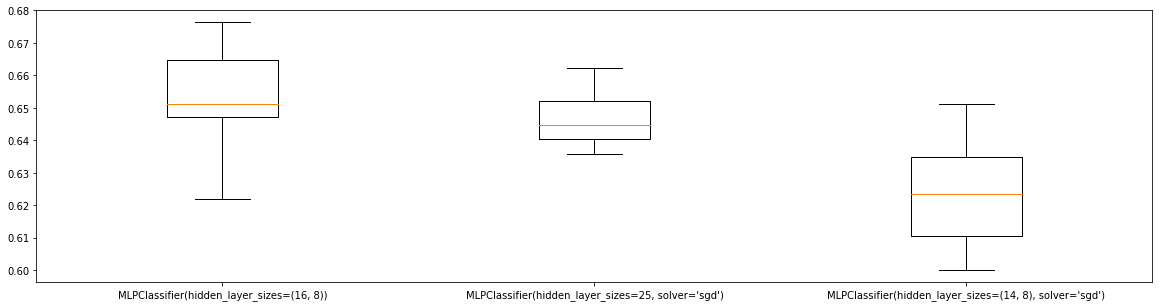

In [49]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.boxplot([f_scores_pg[0], f_scores_pg[1], f_scores_pg[2]])
ax.set_xticklabels([str(models_pg[0]), str(models_pg[1]), str(models_pg[2])])
plt.show()

#### Arquitetura própria

#### 1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)

In [3]:
# Após definição do número de épocas como 200, obtém-se apenas 3 redes distintas

models_arq = [
          MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', solver='sgd', max_iter=200),
          MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=200), 
          MLPClassifier(hidden_layer_sizes=(10, 8), activation='relu', solver='adam', max_iter=200)
]

#### 2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições
#### 2.1 Considere o melhor otimizador para cada uma delas
#### 2.2 Faça uso de 200 épocas para treinamento
#### 2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura

In [22]:
accuracies_arq, f_scores_arq = [], []
for i in models_arq:
    accuracies_arq.append([])
    f_scores_arq.append([])

for i in range(len(models_arq)):
    for j in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
            
        X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
        X_test_std = (X_test - np.mean(X_train)) / np.std(X_train)
        
        X_train_std.replace([np.inf, -np.inf], np.nan, inplace=True)

        perceptron = models_arq[i]
        perceptron.fit(X_train_std, Y_train)
        
        Y_pred_train = perceptron.predict(X_train_std)
            
        accuracy = accuracy_score(Y_train, Y_pred_train)
        accuracies_arq[i].append(accuracy)
        
        f_score = f1_score(Y_train, Y_pred_train, average='macro')
        f_scores_arq[i].append(f_score)

In [23]:
medias_acuracias_arq, medias_fscores_arq, dp_acuracias_arq, dp_fscores_arq = [], [], [], []
for i in range(0, len(models_arq), 1):
    media = np.mean(accuracies_arq[i])
    desvio_padrao = np.std(accuracies_arq[i])
    
    medias_acuracias_arq.append(media)
    dp_acuracias_arq.append(desvio_padrao)

    media = np.mean(f_scores_arq[i])
    desvio_padrao = np.std(f_scores_arq[i])

    medias_fscores_arq.append(media)
    dp_fscores_arq.append(desvio_padrao)

In [52]:
for i in range(0, len(models_arq), 1):
    print("Modelo:",models_arq[i])
    print("Média da Acurácia: %.4f "%medias_acuracias_arq[i])
    print("Desvio padrão da Acurácia: %.4f" %dp_acuracias_arq[i])
    print("Média do F-Score: %.4f "%medias_fscores_arq[i])
    print("Desvio padrão do F-Score: %.4f" %dp_fscores_arq[i])
    print("\n")

Modelo: MLPClassifier(hidden_layer_sizes=(20, 20), solver='sgd')
Média da Acurácia: 0.8159 
Desvio padrão da Acurácia: 0.0025
Média do F-Score: 0.6840 
Desvio padrão do F-Score: 0.0083


Modelo: MLPClassifier(hidden_layer_sizes=(20, 10))
Média da Acurácia: 0.8062 
Desvio padrão da Acurácia: 0.0027
Média do F-Score: 0.6829 
Desvio padrão do F-Score: 0.0069


Modelo: MLPClassifier(hidden_layer_sizes=(10, 8))
Média da Acurácia: 0.7667 
Desvio padrão da Acurácia: 0.0050
Média do F-Score: 0.5985 
Desvio padrão do F-Score: 0.0164




#### 3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

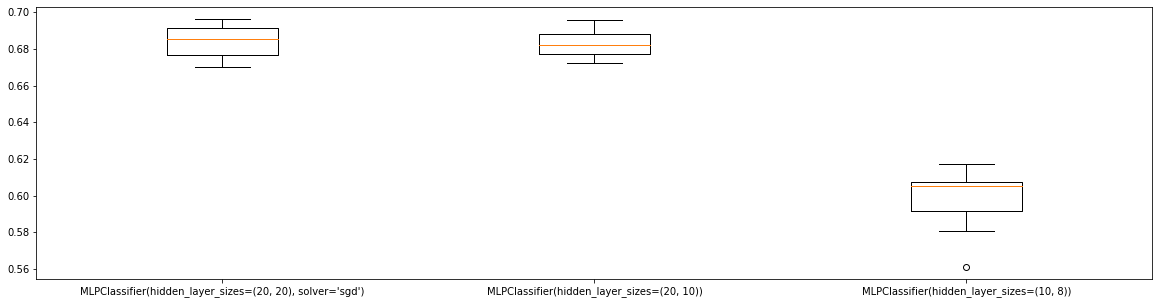

In [36]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.boxplot([f_scores_arq[0], f_scores_arq[1], f_scores_arq[2]])
ax.set_xticklabels([str(models_arq[0]), str(models_arq[1]), str(models_arq[2])])
plt.show()

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

#### 1. É possível identificar uma rede com desempenho superior às demais?

Sim, a partir da análise da Acurácia  e F-Score, a rede com duas camadas ocultas de 20 neurônios, função de ativação Relu e utilizando o solver SGD, apresentou o melhor desempenho com base na análise da Acurácia e F-Score.

- Média da Acurácia: 0.8159 
- Desvio padrão da Acurácia: 0.0025
- Média do F-Score: 0.6840 
- Desvio padrão do F-Score: 0.0083

#### 2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?

A Estratégia Própria, pois tanto para o treinamento com e sem atributos categóricos, as médias das redes presentes no top 3 de acurácia e f-score são melhores.

Sem atributos categóricos:
- Média da acurácia (Pirâmide Geométrica): 0,7389
- Média da acurácia (Estratégia Própria): 0,7477
- Média do F-Score (Pirâmide Geométrica): 0,5801
- Média do F-Score (Estratégia Própria): 0,5849

Com atributos categóricos:
- Média da acurácia (Pirâmide Geométrica): 0,7903
- Média da acurácia (Estratégia Própria): 0,7962
- Média do F-Score (Pirâmide Geométrica): 0,6408
- Média do F-Score (Estratégia Própria): 0,6551

#### 3. Considerar os atributos categóricos trouxe melhorias? Justifique.


Sim, considerando atributos categóricos observou-se redes com maior Acurácia e F-Score do que as treinadas sem os atributos categóricos.

Sem atributos categóricos:
- Média da acurácia (Pirâmide Geométrica): 0,7389
- Média da acurácia (Estratégia Própria): 0,7477
- Média do F-Score (Pirâmide Geométrica): 0,5801
- Média do F-Score (Estratégia Própria): 0,5849

Com atributos categóricos:
- Média da acurácia (Pirâmide Geométrica): 0,7903
- Média da acurácia (Estratégia Própria): 0,7962
- Média do F-Score (Pirâmide Geométrica): 0,6408
- Média do F-Score (Estratégia Própria): 0,6551

#### 4. Um número maior de épocas trouxe melhorias?


Em todos os rankings de melhores redes, foram observadas redes com números diferentes de épocas, de 100 a 200, assim um melhor desempenho não depende somente de um número maior de épocas.

#### 5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

A utilização de RNAs apresentou-se como uma solução satisfatória para o problema, sendo a maior dificuldade a escolha do melhor conjunto de hiperparâmetros e parâmetros da RNA.